# EDA To Prediction(DieTanic)
타이타닉의 침몰은 역사상 가장 악명높은 난파선중 하나이다(The sinking of the Titanic is one of the most infamous shipwrecks in history).
1912년 4월 15일, 그녀의 소녀시절 항해기간동안, 타이타닉호는 한 빙산과 총돌 후 2224명 중 1502명의 승객과 선원이 죽으며 침몰하였다(On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew).
이 사건은 누구도 잊을 수 없는 재앙이다(This is a very unforgetable disaster that no one in the world can forget).

이는 타이타닉호를 만드는데 750만 달러가 들었고 충돌때문에 바다 아래로 침몰하였다(It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision).
타이타닉 데이터셋은 데이터 사이언스의 모험을 시작하는 초심자들에게 굉장히 좋은 데이터셋이고 케글 경진대회 참여에도 좋다(The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle).

이 노트북의 목적은 어떻게 예측 모델링 문제의 워크플로우가 진행되는 것에 대한 영감을 주는 것이다(The objective of this notebook is to give an idea how is the workflow in any predictive modeling problem).
어떻게 우리가 피처들을 확인하고 새로운 피쳐를 추가하고 어떤 머신 러닝 개념을 적용하는지 확인해라(How do we check features, how do we add new features and some Machine Learning Cocnepts).
난느 이 노트북이 가능한 기초로 이용되어 새로운 사람들이 모든 부분을 이해하길 바랍니다(I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it).

If You Like the notebook and think that it helped you.. PLEASE UPVOTE. It woll keep me motivated.

# 노트북의 목차(Contents of the Notebook):
### 파트1: 탐험적 데이터 분석(EDA, Part1: Exploratory Data Analysis):
1) 피처들 분석(Analysis of the features).
2) 여러 피처들을 대상으로 관계 혹은 경향 발견(Finding any relaations or trends considering multiple features).

### 파트2. 피처 엔지니어링과 데이터 클린징(Part2. Feature Engineering and Data Cleaning):
1) 몇개의 피처들 추가(Adding any few features).
2) 잔여 피쳐들 제거(Removing redundant features).
3) 피쳐들을 모델링을 위한 적합한 형태로 변환(Converting features form for modeling).

### 파트3. 예측력있는 모델링(Predictive Modeling).
1) 기초 알고리즘 실행(Running Basic Algorithms).
2) 크로스 밸리데이션(Cross Validation).
3) 앙상블(Ensemble).
4) 중요 피쳐들 추출(Important Features Extraction).

# 파트1: 탐험적 데이터 분석(EDA, Part1: Exploratory Data Analysis)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [3]:
data = pd.read_csv('input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 결측 값들 총 정리(check for total null values)

data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

나이(age), 선실(cabin), 탑승위치(Embarked)에 결측값 존재. 이들의 수정해야함

## How many Survived??

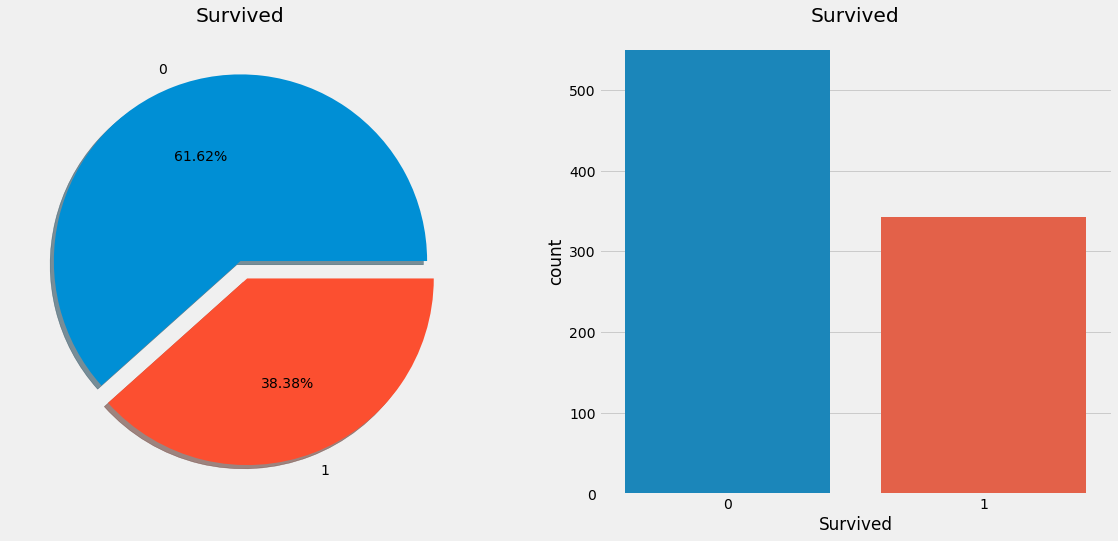

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

이를 통해 많은 승객들이 사고로 살지 못한 것을 보여준다

훈련 데이터의 891명의 승객중 오직 350명만 살아남았다. 즉, 총 훈련 데이터셋에서 38.4%만이 그 충돌에서 살았다. 우리는 데이터로부터 더 좋은 인사이트를 얻기 위해 깊이 파고 들어야 한다. 누가 살았고 누가 그렇지 못했는지에 대한 category로 살펴보자

우리는 데이터의 다른 피쳐를 이용하여 생존률을 확인할 것이다. 이는 sex, port of embarcation, age 등이 될것이다.

먼저 피쳐들의 다양한 유형들에 대해 이해해 보자

## Types Of features

### Categorical Features: Sex, Embarked
카테고리컬 변수는 2개 혹은 더 많은 카테고리를 갖고 해당 변수는 이에 따라 분류가 된다.
예를 들면, 성별은 카테고리형 변수여서 2가지 male, female을 갖는다. 이제 우리는 그러한 변수에는 어떤 순서를 부여하거나 정렬할 수 없다. Nominal Variables라고도 불린다.
### Ordinal Features in dataset: Pclass(순서가 있는 nominal 자료)
### Continous Feature: Age
해당 변수에 최소, 최대 값 사이에 값들이 존재함

### Analysing the features
### Sex $\rightarrow$ Categorical Feature


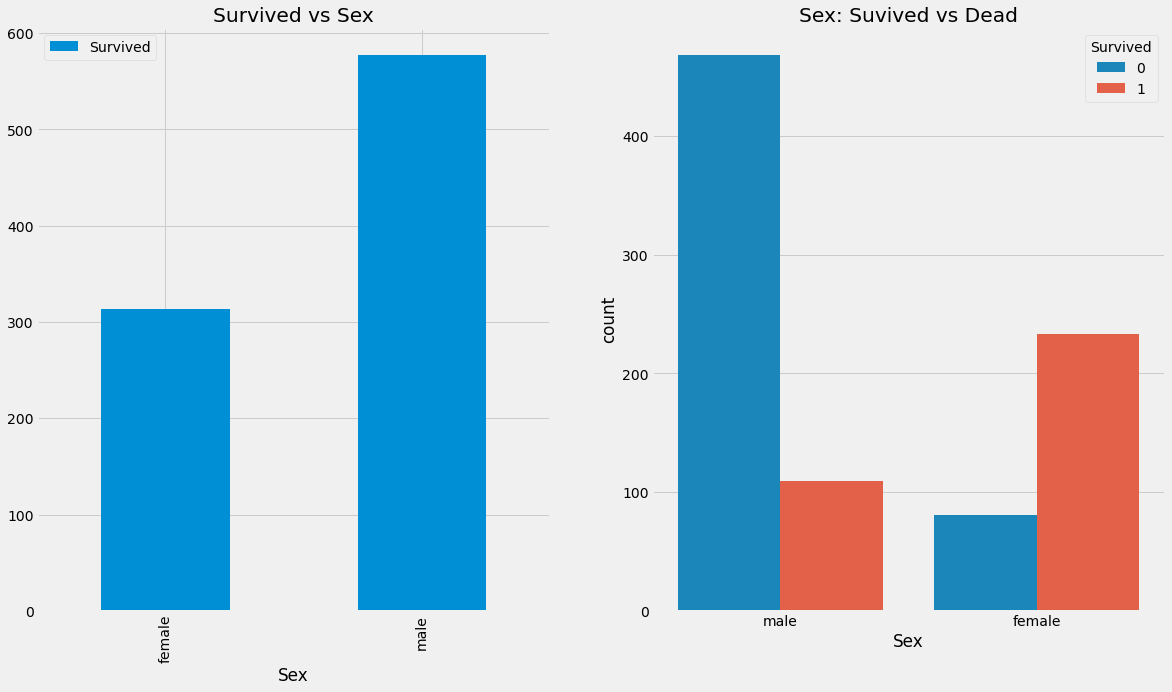

In [34]:
f, ax = plt.subplots(1,2, figsize=(18,10))
data[['Sex', 'Survived']].groupby('Sex').count().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1]) # x:Sex, y:Survived
ax[1].set_title('Sex: Suvived vs Dead')
plt.show()

흥미로운 결과를 확인할 수 있습니다. 선박의 남성의 수는 여성의 수 보다 훨씬 많습니다. 하지만 생존 여성의 수는 거의 생존 남성의 수의 2배 가까이 됩니다. 선박에서 여성의 생존 비율은 거의 75%이지만 남성은 18~19%정도입니다.

이는 모델링에서 굉장히 중요한 피쳐로 보입니다.

### Pclass $\rightarrow$ Ordinal Feature

In [46]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


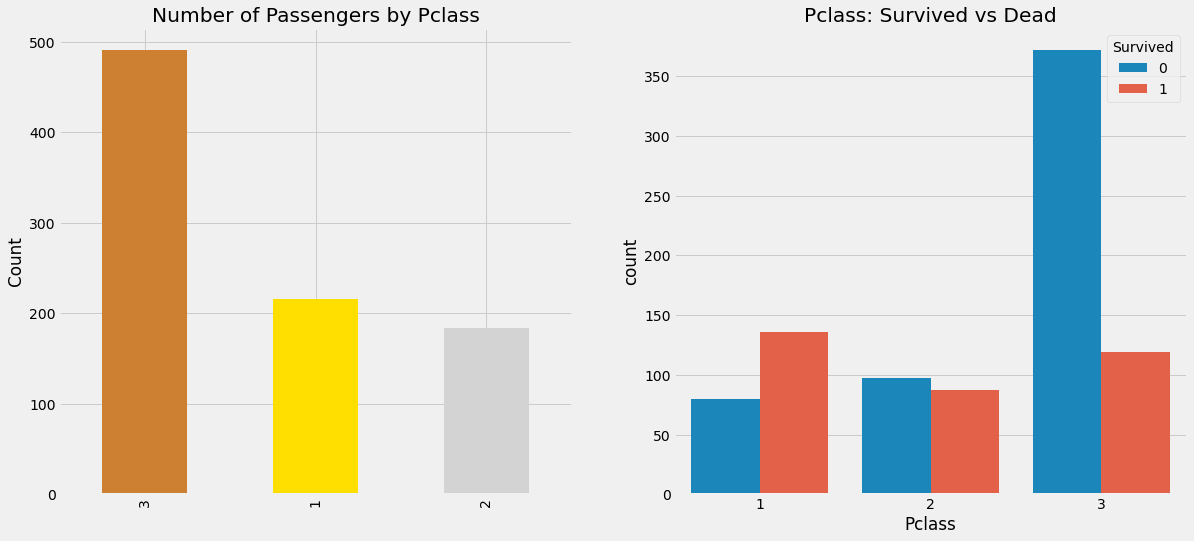

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

소위 'Money Can't Buy Everything'라지만.... 우리는 1등석의 승객들이 구조과정에서 더 큰 우선권을 부여받은 것을 확인할 수 있습니다. 비록 3등석의 승객의 수가 훨씬 많지만 그들의 생존 수는 약 25%로 굉장히 낮습니다.

1등석의 생존 비율은 거의 63%이고 2등석은 48% 가까이 됩니다. 그래서 돈과 권력은 중요한 물질주의적 세상입니다.

더 깊이 들어가서 다른 흥미로운 관찰을 해봅시다. 성별과 Pclass를 함께 생존과 확인해봅시다.

In [59]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

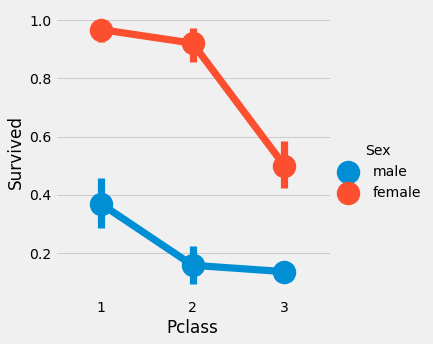

In [71]:
# 등급과 성별에 따른 생존률
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

FactorPlot은 카테고리별 시각화가 굉장히 효과적입니다.

CrossTab과 FactorPlot에 따르면 우리는 쉽게 1등석 여성의 생존은 95~96%에 달하여 94명중 오직 3명만 죽은 것을 확인할 수 있습니다.

Pclass와 상관없이 여성이 우선적으로 구조과정의 우선순위를 부여받았습니다. 심지어 1등석의 남성은 굉장히 낮은 생존율을 보여주고 있습니다.

Pclass 역시 굉장히 중요한 특징으로 보입니다.

### Age $\rightarrow$ Continuous Feature

In [76]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


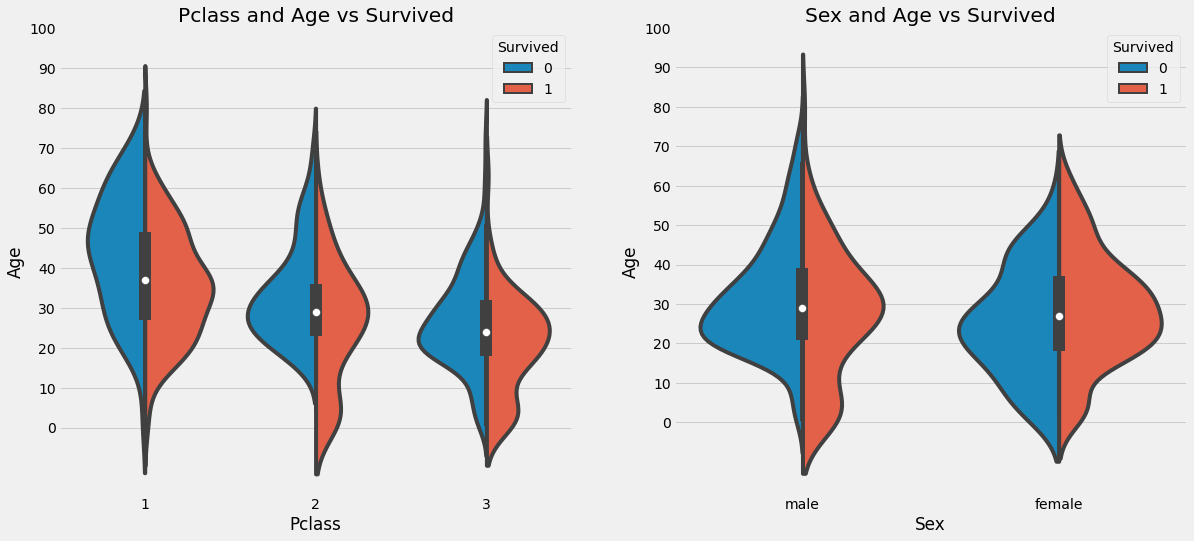

In [87]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))


sns.violinplot('Sex', 'Age', hue='Survived', data= data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### Observation:
1) Pclass에 따라 아이의 수는 증가(어릴 수록 좌석 등급이 떨어짐). 10대 이하의 승객의 생존률은 좌석 등급에 무관하게 좋은 것을 보임(1, 주황색)
2) 1등석의 20~50대 승객들의 생존 기회는 높고 여성은 더 높음
3) 남성의 경우 나이가 많으면 생존률이 떨어지는 것을 확인할 수 있다

Age는 177개의 결측 값이 존재합니다. 이를 처리하기 위해, 우리는 데이터의 평균값을 할당할 수 있습니다.

하지만 사람들의 나이는 정말 다양합니다. 우리는 4살 아이에게 평균인 29살을 부여할 수 없습니다. 그렇다면 다른 나이를 예측할 방법이 없을까요?

나이라는 피처를 확인할 수 있습니다. 해당 특징을 살펴보았을 때, 우리는 Mr, Mrs라는 인사말을 가지는 것을 확인할 수 있습니다. 그러므로 우리는 Mr와 Mrs의 평균을 할당할 수 있습니다.

### What's In A Name?? $\rightarrow$ Feature

In [92]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

우리는 정규식(Regex): [A-Za-z]+)\. 를 이용합니다. A-Z는 대문자 A에서 Z까지 
혹은 a-z는 소문자 a에서 z까지 그리고 다음에 .이 오는 문자를 찾습니다.
('대문자''소문자'''.') 그래서 우리는 성공적으로 이름으로부터 원하는 것을 찾아냅니다.


In [101]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle, Mme 처럼 Miss를 잘못 적은 것도 있습니다. 따라서 다른 값들 통일해주는 작업을 합니다

In [102]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [104]:
data.groupby('Initial')['Age'].mean() # Let's check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling Nan Ages

In [110]:
# Assigning the NaN values with the ceill values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 46
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

In [114]:
data.Age.isnull().any() # So no null values left finally

False

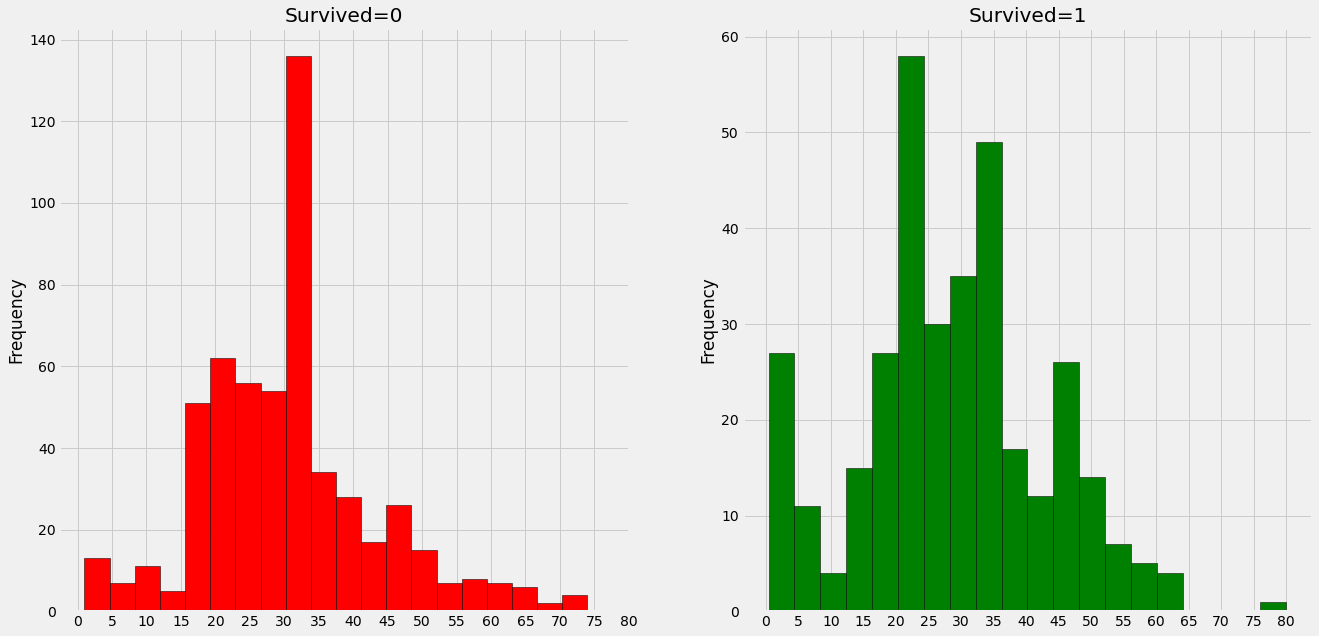

In [124]:
# NaN 처리 후 나이별 생존에 대한 분포도
f, ax = plt.subplots(1, 2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(x1)
plt.show()

### 관측 결과:
1) 5세 이하의 유아는 굉장히 많이 살아남음(여성과 아이 우선 정책)
2) 80세 이상의 노인은 살아남으심
3) 가장 많이 죽은 연령대는 30~40대이다


<Figure size 1296x864 with 0 Axes>

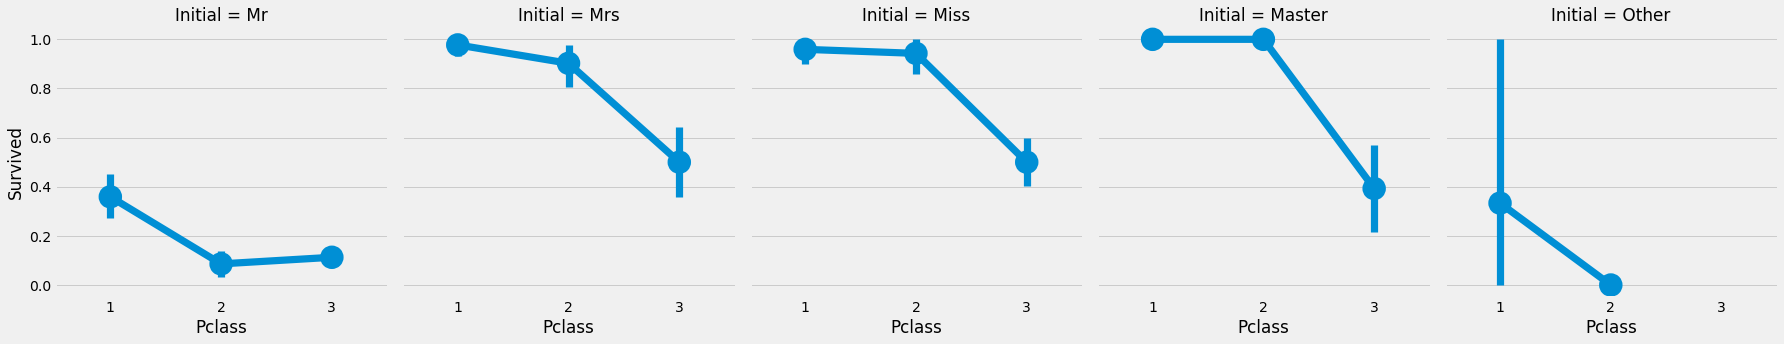

In [128]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성과 아이 우선 정책은 클래스에 상관없이 작동한다

### Embarked $\rightarrow$ Categorical Value

In [139]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

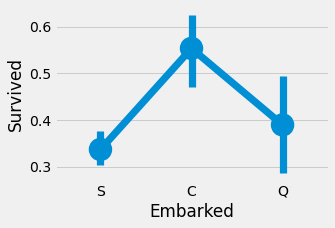

In [141]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C에서 탑승한 승객의 생존 비율이 약 0.55로 가장 높고 S는 가장 낮음

Text(0.5, 1.0, 'Embarked vs Pclass')

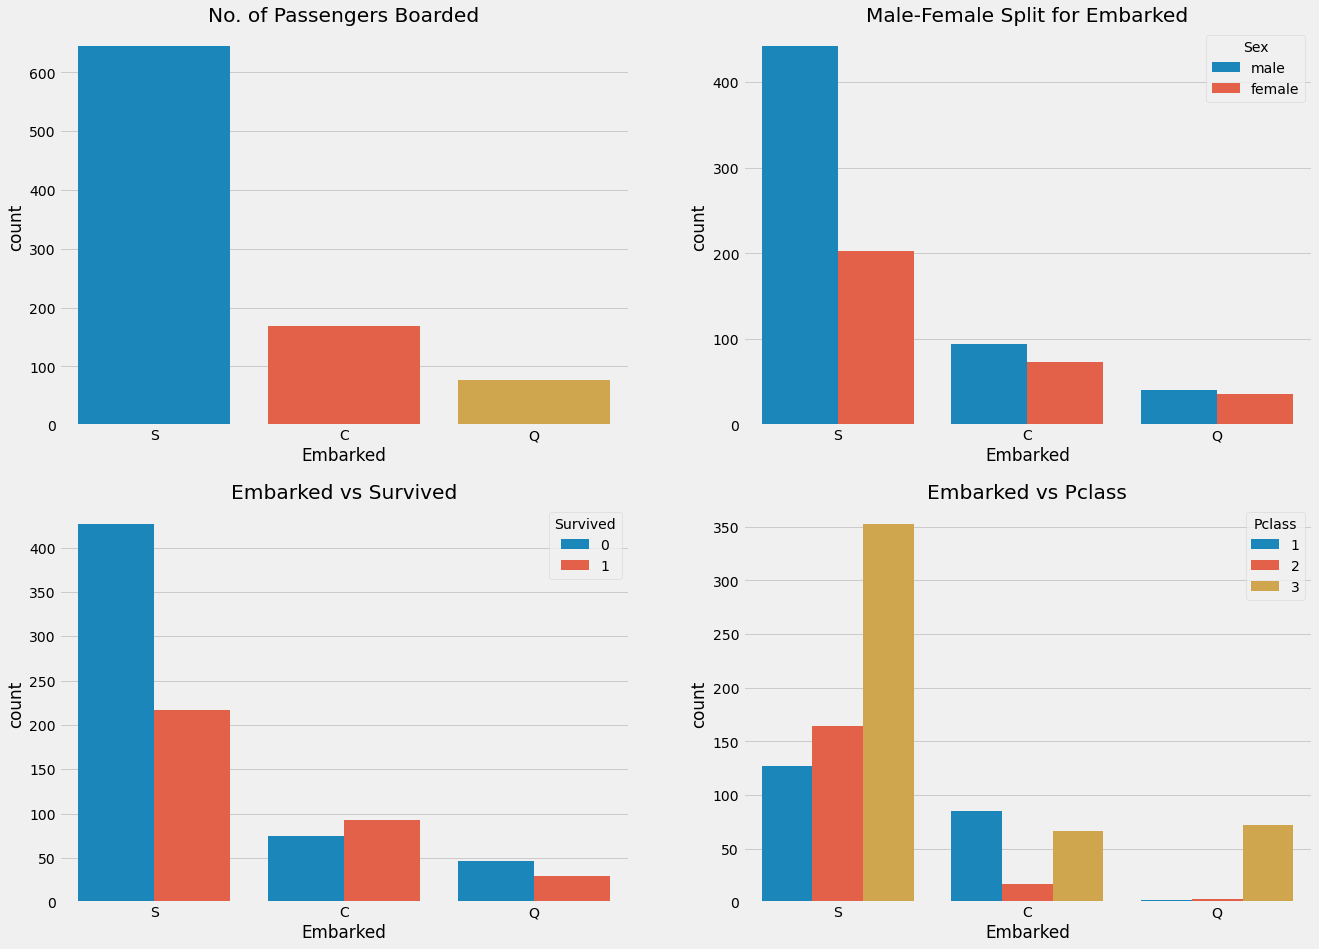

In [146]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.show()

관측 결과:
1) S에서 탑승한 대다수는 3등석이다
2) C에서 탑승한 승객은 많은 비율이 살아남은 행운이 보인다. 그 이유는 1,2등급 고객이 구조된 것 같다
3) S 탑승객의 대다수는 3등급이어서 생존 못한 사람이 엄청 많음(3등석의 81%는 ㅠㅠ)
4) Q포트는 거의 3등석이 차지함

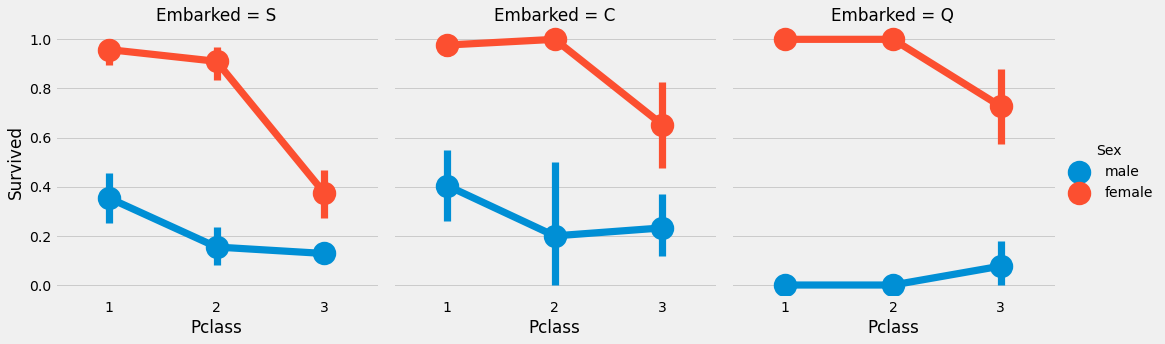

In [151]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

관측 결과:
1) Pclass와 상관없이 1, 2등석 여성은 대다수 살아남음
2) S의 3등석은 성별에 무관하게 굉장히 불운해(Money Matter)
3) Q의 남잔 거의 살아남지 못함...

### Filling Embarked NaN
2명이므로 S에서 대다수의 승객들이 탑승함에 따라 우리는 NaN을 처리 S로 처리

In [155]:
data['Embarked'].fillna('S', inplace=True)

In [156]:
data['Embarked'].isnull().any()

False

### SibSp $\rightarrow$ Discrete feature
이 피처는 한 사람이 혼자인지 아니면 가족과 함께왔는지를 나타낸다

Sibling = 형재, 자매

Spouse = 남편, 아내

In [160]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


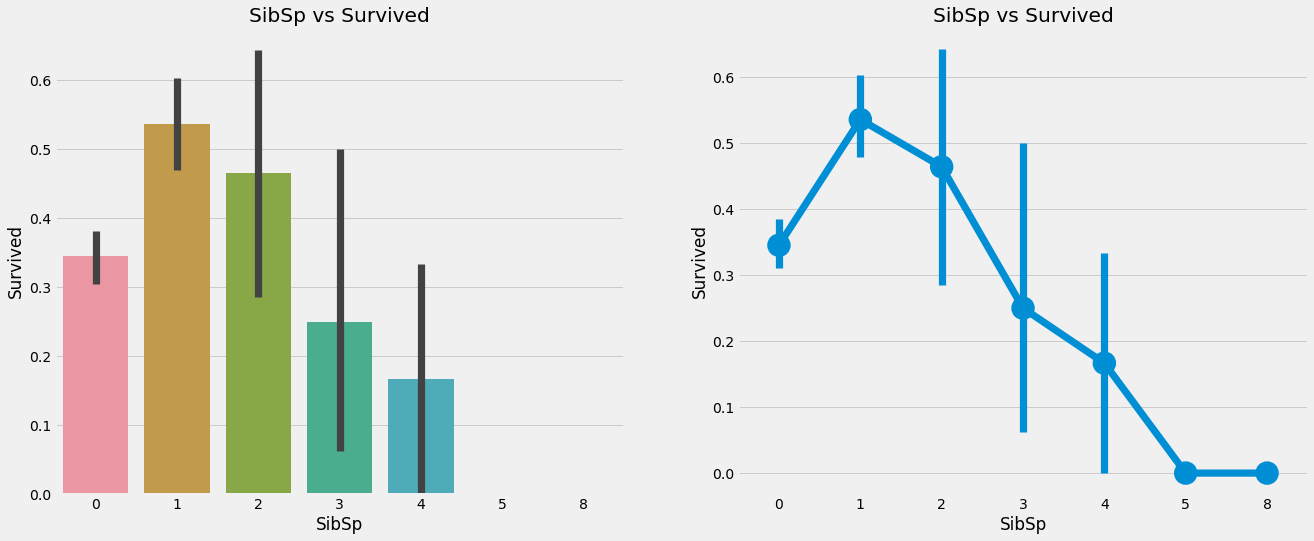

In [164]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [165]:
pd.crosstab(data.SibSp, data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


### 관측 결과:
barplot과 factorplot에 따르면 한 승객이 혼자 탑승했다면, 34.5% 생존한다.
해당 그래프는 동승객이 많을수록 감소합니다. 이는 당연하죠.
즉, 만약 가족과 함께 탑승하면 스스로 생존하려기 보다는 가족을 살리려고 노력할 것입니다. 놀랍게도 5~8명의 가족의 생존은 0%입니다. 

그 이유는 아마 Pclass입니다. crosstab을 확인하면 동승객이 3명이 넘으면 모두 3등석입니다. 즉, 3등석의 대가족은 생존하지 못했습니다.

### Parch $\rightarrow$ Categorical

In [170]:
pd.crosstab(data.Parch, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


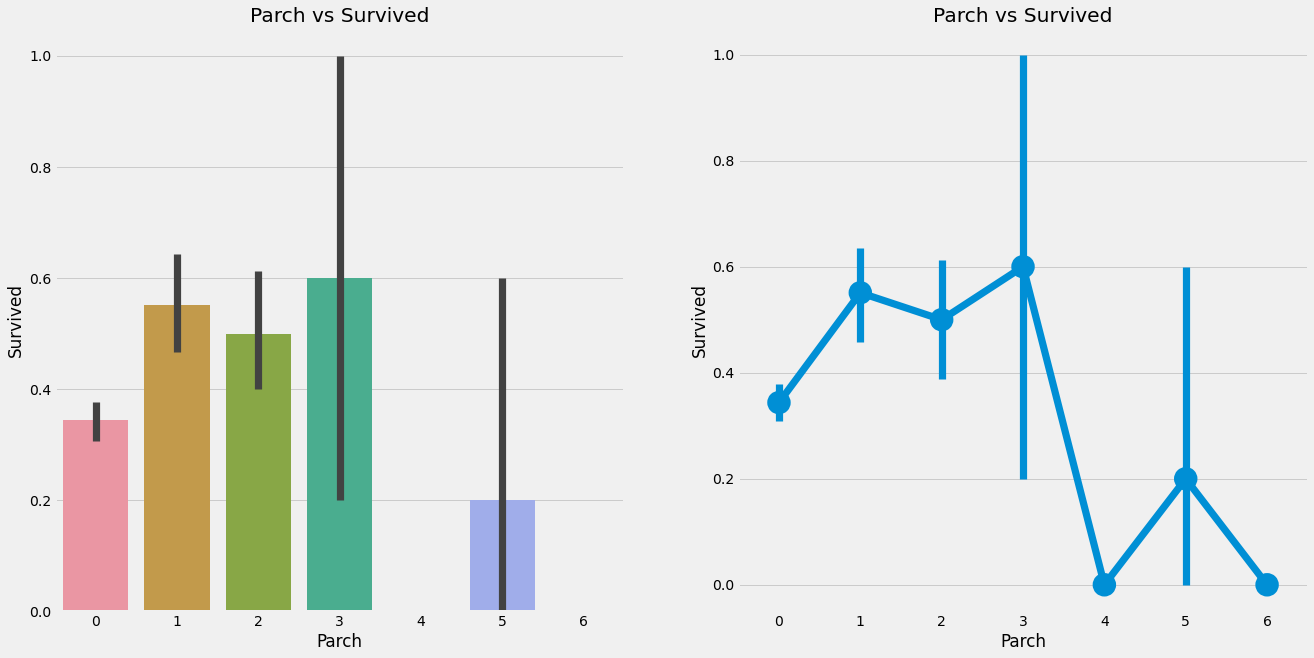

In [172]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

### 관측 결과:
부모님과 함께 탐승한 승객은 생존 기회가 크다. 하지만 그 수는 점점 줄어든다.

생존 확률은 1-3명의 부모님과 함께 탑승한 사람이 좋다. 혼자 탑승한 사람 또한 위험하고 4명 이상 같이 탑승하면 생존 확률이 감소한다.

### Fare $\rightarrow$ Continuous Feature

In [173]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


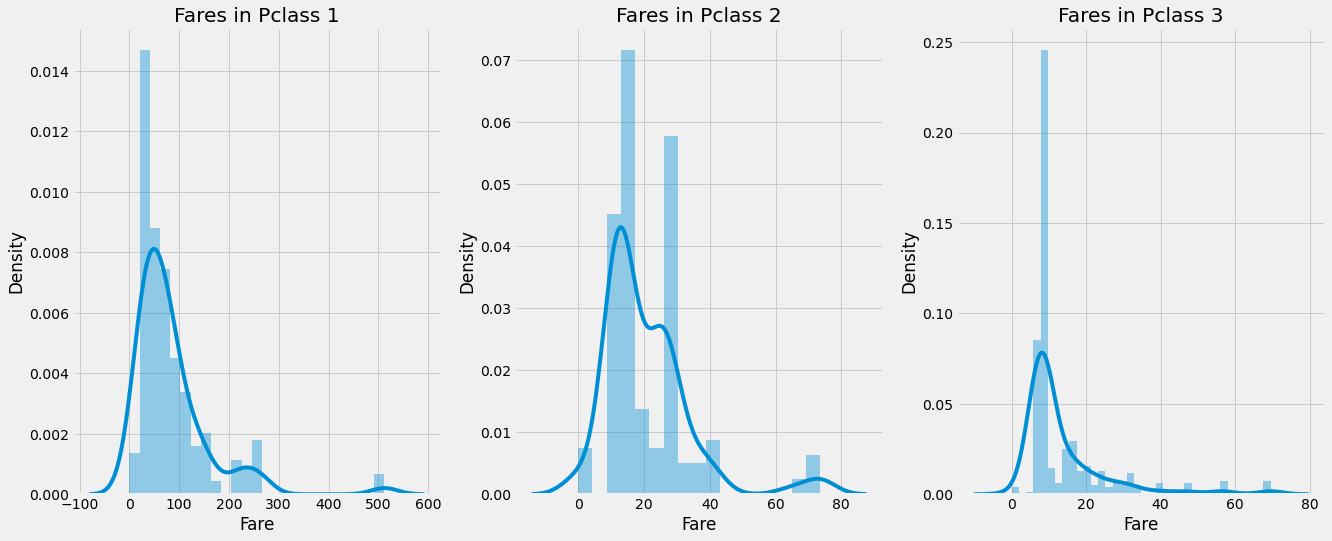

In [180]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

Pclass1 승객들의 운임에 큰 분포가 있는 것으로 보이고 이 분포는 표준이 감소함에 따라 감소하는 것으로 보인다. 이 값도 연속값이므로 bin을 이용하여 변환할 수 있다.


### 모든 기능에 대한 간략한 관찰:
**Sex**: 남성에 비해 여성의 생존확률이 높음

**Pclass**: 1등석의 승객이면 더 나은 생존 기회를 받음. 반대로 3등석은 굉장히 낮음. 여성의 경우 1등석이면 거의 1의 가능성으로 생존 2등석 역시 굉장히 높은 확률. 돈이 곧 생존이다

**Age**: 5~10세의 아이들은 생존의 확률이 높음. 15-35세는 많이 죽음

**Embarked**: 굉장히 흥미로운 피처. C에서 탑승한 승객의 생존 확률은 좋은편임. 심지어  1등석 대다수가 S에서 있었지만... Q의 승객의 대다수는 3등석

**Parch+SibSp**: 1-2의 배우자 혹은 1-3의 부모 지표는 혼자 혹은 대가족보다 나은 생존률을 보여줌



### Correlation Betwwen the Features

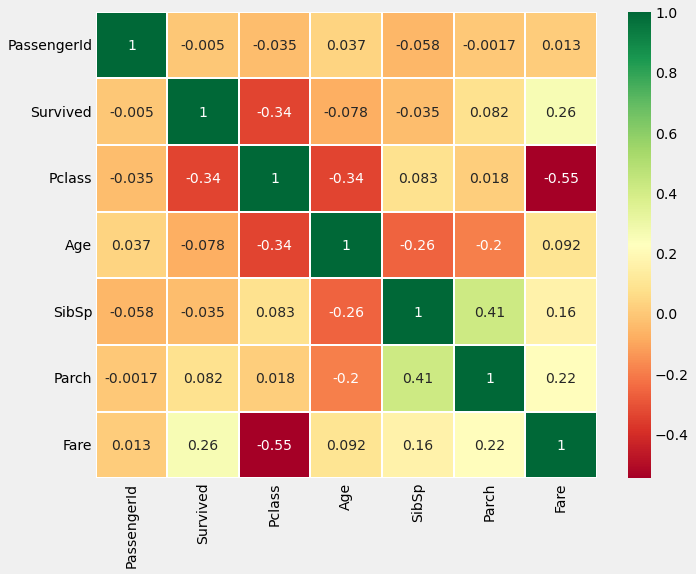

In [182]:
corr = data.corr('pearson')
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석
첫번째로 알파벳이나 문자열 사이의 상관관계를 알 수 없다는 것 분명하기 때문에 숫자 기능만 비교된다는 것이다. 해당 그림을 이해하기 전에 상관관계가 무엇인지 알아보자

**양의 상관관계**: 만약 피처a에서 증가가 B의 증가를 이끈다면, 양의 상관 관계가 있다. 1은 완벽한 양의 상관관계를 의미한다.

**음의 상관관계**: 만약 피처a에서 증가가 B의 감소를 이끈다면, 음의 상관 관계가 있다. -1은 완벽한 음의 상관관계를 의미한다.

즉, 한 변수의 증가가 다른 변수의 증가도 이끈다. 이는 그 변수들은 굉장히 유사한 정보를 가지고 있고 굉정히 적거나 어떠한 정보의 변동이 없다는 것이다. 이는 거의 동일한 정보를 가지는 다중공선성이라고 알려져있다.

그래서 둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하나? 아니!
모델을 만들거나 훈련시키는 중에 우리는 나머지 변수를 제거했어야 한다 왜냐하면 이는 훈려 시간과 많은 장점을 없애기 때문이다.

이제 위의 히트맵으로부터 우리는 변수들이 그렇게 많이 상관 관계를 갖지 않은 것을 알 수 있다. 가장 크게 상관된  변수는 SibSp과 Parch로 0.41이다. 그래서 우리는 모든 변수를 이용할 수 있다.

# Part2: Feature Engineering and Data Cleaning

Feature Engineering이란?

우리에게 피쳐가 포함된 데이터셋이 주어질 때, 모든 피쳐가 다 중요하 것은 아니다. 제거해야할 불필요 피쳐들이 있을 수 있다. 또한 우리는 새로운 피쳐를 다른 피처로부터 정보의 관찰 혹은 추출로 얻을 수 있습니다.

하나의 예시는 Initals 피쳐를 이름으로부터 얻은 것입니다. 우리가 새로운 피쳐를 얻거나 제거할 수 있는지 확인해봅시다. 또한 우리는 기존의 연관된 피쳐를 적절히 변환시켜 예측력 모델링에 사용할 것 입니다.

### Age_band

**나이 피쳐의 문제**
이전에 언급한바와 같이 나이는 연속적인 피처이므로 머시러닝 모델에서 연속 값으로 문제가 있습니다.

예를 들면, 스포츠인을 성별로 그룹화하거나 정렬하면 쉽게 남성과 여성으로 구분할 수 있습니다. 

이번에 나이로 그들을 그룹화하면 어떻게 할 것인가요? 만약 30명의 사람이 있다면, 30가지의 값이 있을 것입니다. 이는 문제가 됩니다.

따라서 우리는 이러한 연속적인 값을 비닝 혹은 정규화로 카테고리컬 값으로 변환해야 합니다. 나는 비닝 즉, 나이의 범위를 하나의 빈 혹은 하나의 값으로 그룹화할 것입니다.

그래서 승객의 최대 나이는 80입니다. 그래서 0~80까지를 5개의 bins로 나눌것입니다. 80/5=16 $\rightarrow$ size=16

In [183]:
data['Age_band'] = 0 # init
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [188]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


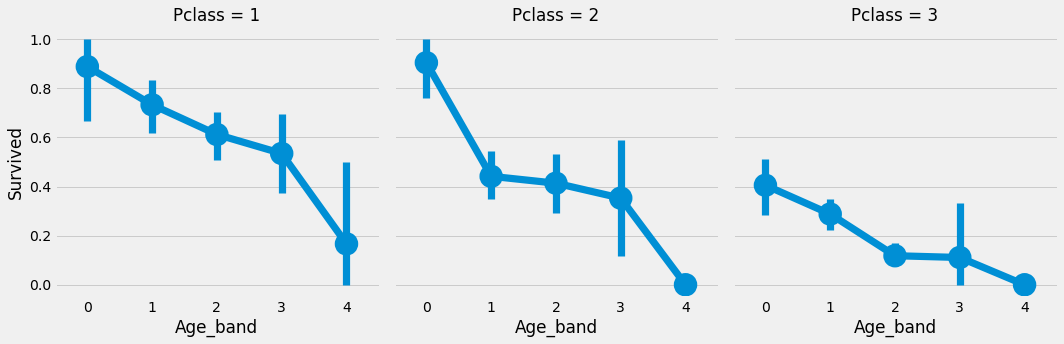

In [189]:
sns.factorplot('Age_band', 'Survived', col='Pclass',data=data)
plt.show()

그래요.... 생존율은 나이가 증가함에 따라 Pclass랑 무관하게 감소하네요

### 가족의 규모와 혼자
새로운 변수 'Family_size'와 'Alone'을 만들고 분석합니다. 이 변수는 Parch와 SibSp의 합입니다. 이는 결합된 데이터를 통해 우리가 생존률이 승객의 가족 규모와 어떠한 관계가 있는지 알게해줍니다. Alone은 한 승객이 혼자인지 아닌지를 나타냅니다.

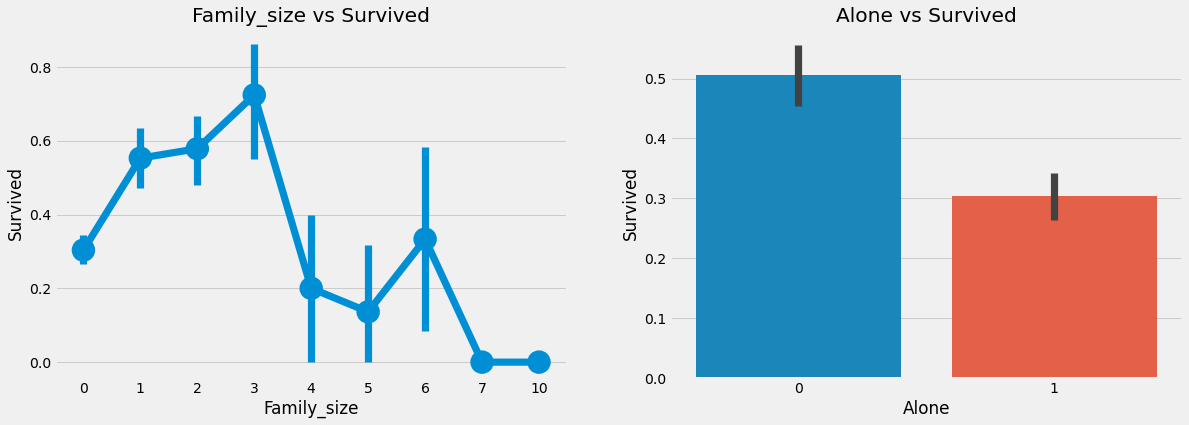

In [190]:
data['Family_size'] = 0
data['Family_size'] = data['Parch']+data['SibSp']

data['Alone'] = 0
data.loc[data['Family_size']==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot('Family_size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_size vs Survived')

sns.barplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title("Alone vs Survived")

plt.show()

**Family_size=0 means that the passenger is alone.**
Clearly, if you are alone or family_size=0 then chances for survival is very low. For family size > 4, the chances decrease too. This also looks to be an important feature for the model. Let's examin this further

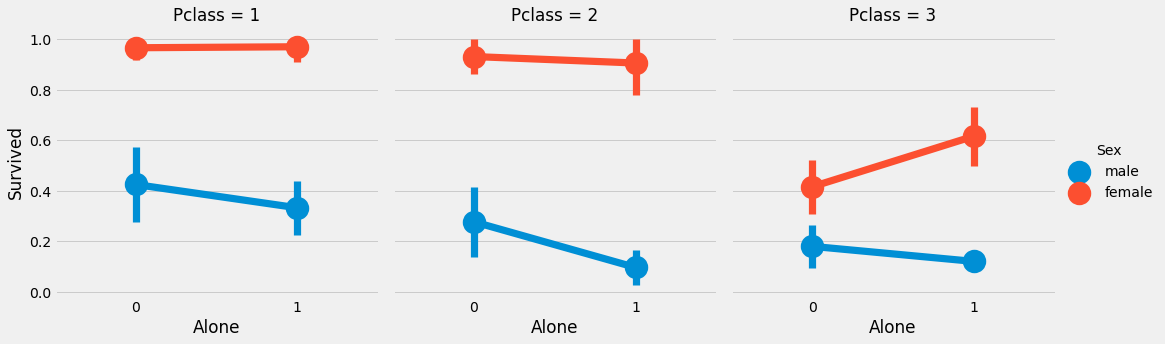

In [191]:
sns.factorplot('Alone', 'Survived', col='Pclass', hue='Sex', data=data )
plt.show()

혼자 있는 여성이 가족이 있는 여성보다 혼자일 확률이 높은 Pclass 3을 제외하고는 성별이나 좌석등급을 불문하고 해롭다는 것을 알 수 있다.

### Fare_Range
요금 또한 연속적인 피처이기 떄문에 우리는 순서가 있는 카테고리컬 값(ordinal)으로 변환해야 한다. 이를 위해, 우리는 pandas.qcut를 사용할 것이다.

qcut은 빈에 따라 값을 변환시켜준다. 따라서 우리는 5개의 빈을 주어 값들을 5개의 나뉘어진 빈 혹은 값의 변위로 정렬시킬것이다.

In [193]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


앞에서 이야기한것과 같이, 요금의 범위가 증가함에 따라 생존할 확률 또한 증가한다.

이제 우리는 Fare_Range 값을 이용할 수 없다. 우리는 이 값을 Age_band에서와 같이 단순한 값으로 바꾸어 줘야한다

In [194]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0), 'Fare_cat']=2
data.loc[data['Fare']>31.0, 'Fare_cat']=3
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3


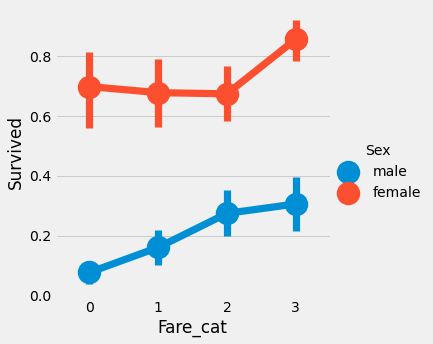

In [195]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=data )
plt.show()

확실히 요금이 증가함에따라, 생존 확률도 증가합니다. 이 변수는 아마 성별에 따른 모델링 과정에서 중요하게 작동할 것입니다.

### Converting String value into Numeic
문자형 자료는 머신러닝 모델에 이용할 수 없기 때문에 우리는 Sex, Embarked 등을 수치형 값으로 변환해야한다

In [197]:
data['Sex'].replace(['male', 'female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],
                      [0,1,2,3,4], inplace=True)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1


### Dropping UnNeeded Features

**Name** $\rightarrow$ 우리는 이름 피처를 어떠한 카테고리컬 변수로 변환할 수 없으므로 필요로 하지 않는다.

**Age** $\rightarrow$ Age_band로 대체

**Ticket** $\rightarrow$ 임의의 문자열임

**Fare** $\rightarrow$ Fare_cat으로 대체

**Cabin** $\rightarrow$ 너무 많은 결측치와 승객들이 여러 개의 선실을 가지고있음. 따
라서 제거

**Fare_Range** $\rightarrow$ Fare_cat으로 대체

**PassengerId** $\rightarrow$ 의미 없는 숫치형

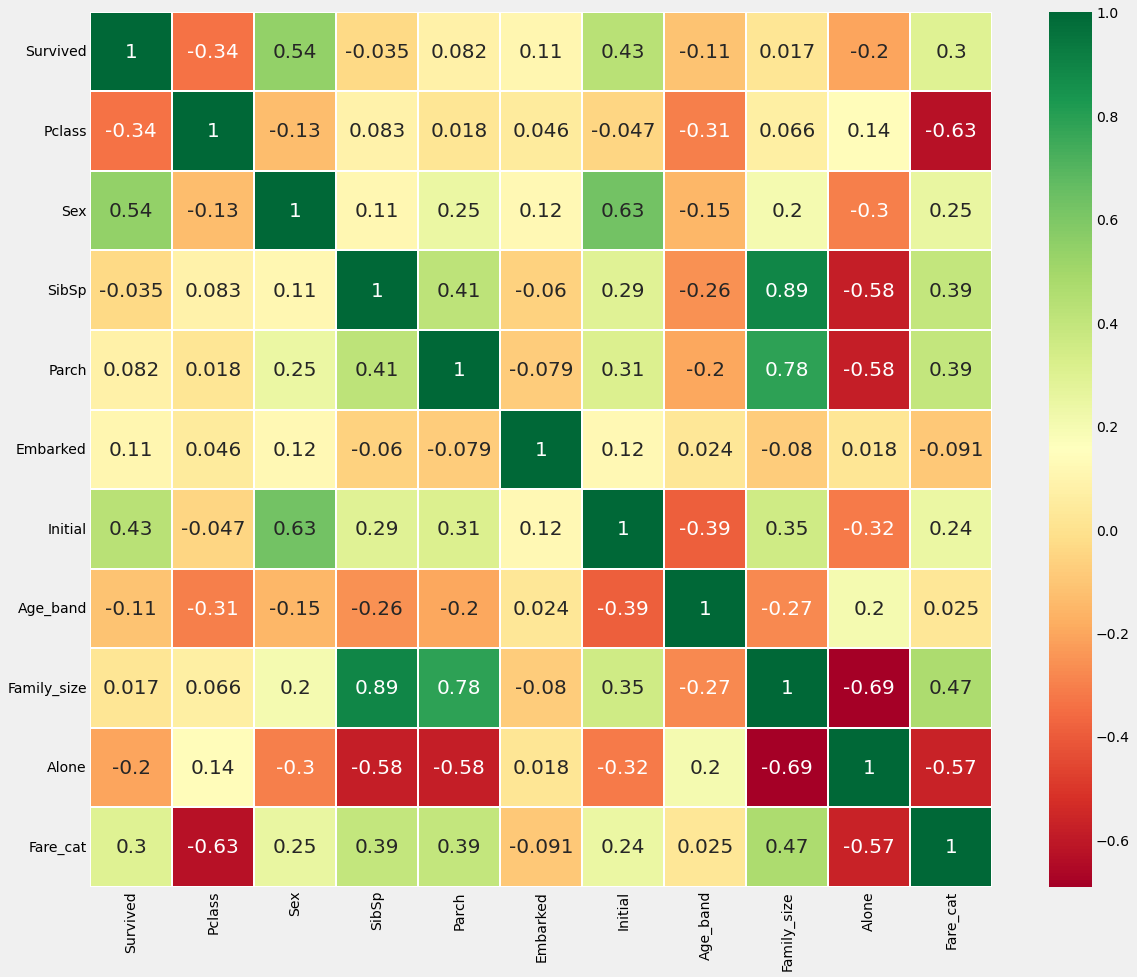

In [202]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
corr = data.corr('pearson')
sns.heatmap(corr, annot=True, linewidth=0.1, cmap='RdYlGn', annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

우리는 몇몇 양의 상관성을 갖는 피처를 볼 수 있다. SibSP과 Family_size 그리고 Parch와 Famliy_size 반대로 Alone과 Family_size는 음의 상관관계를 갖는 것 등.

### Part3: Predictive Modeling
우리는 EDA를 통해 통창력을 얻을 수 있었다. 그러나 우리는 정확히 예측하거나 구별할 수 없다. 따라서 이제 우리는 승객이 살았는지를 예측하거나 어떤 위대한 분류 알고리즘을 이용할 것이다. 리스트는 아래와 같다
1) Logistic Regression
2) Support Vector Machines(Linear and radial)
3) Random Forest
4) K-Nearest Neighbors
5) Naive Bayes
6) Decision Tree


In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [208]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
x_train = train[train.columns[1:]]
y_train = train[train.columns[:1]]
x_test = test[test.columns[1:]]
y_test = test[test.columns[:1]]
X = data[data.columns[1:]]
y = data['Survived']

### Radial Support Vector Machines(rdf-SVM)

In [232]:
model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(x_train,y_train)
pred1 = model.predict(x_test)
print('Accuracy for rbf SVM is {:.2f}%'.format(accuracy_score(pred1, y_test)*100))

Accuracy for rbf SVM is 83.58%


Linear Support Vector Machine(linear-SVM)

In [233]:
model = SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(x_train,y_train)
pred2 = model.predict(x_test)
print('Accuracy for linear SVM is {:.2f}%'.format(accuracy_score(pred2, y_test)*100))

Accuracy for linear SVM is 81.72%


### Logistic Regression

In [234]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred3 = model.predict(x_test)
print('Accuracy for Logistic Regression is {:.2f}%'.format(accuracy_score(pred3, y_test)*100))

Accuracy for Logistic Regression is 81.34%


### Decision Tree

In [235]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred4 = model.predict(x_test)
print('Accuracy for Decision Tree is {:.2f}%'.format(accuracy_score(pred4, y_test)*100))

Accuracy for Decision Tree is 80.97%


### K-Nearest Neighbors(KNN)

In [236]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
pred5 = model.predict(x_test)
print('Accuracy for KNN is {:.2f}%'.format(accuracy_score(pred5, y_test)*100))

Accuracy for KNN is 81.34%


KNN의 경우 **n_neighbors**에 따라 그 결과의 변화를 살펴봐야 한다.
기본값은 5로 설정되어 있다.

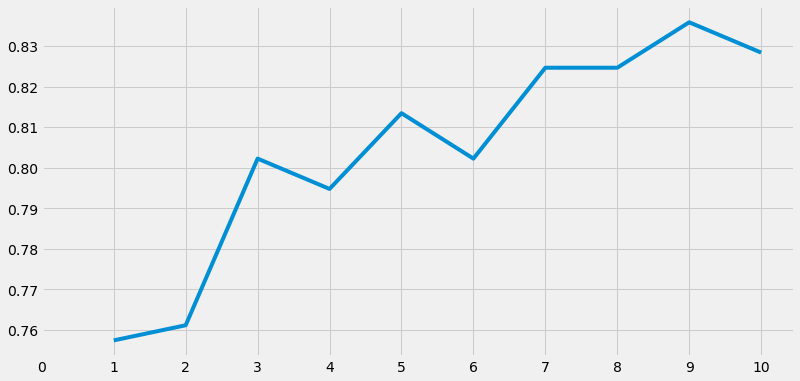

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [237]:
a_index = list(range(1,11))
a = pd.Series()
x= [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(pred,y_test)
    acc = pd.Series(acc)
    a=a.append(acc)
    
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayers

In [241]:
model = GaussianNB()
model.fit(x_train,y_train)
pred6 = model.predict(x_test)
print('Accuracy for KNN is {:.5f}%'.format(accuracy_score(pred6, y_test)*100))

Accuracy for KNN is 81.34328%


### Random Forests

In [240]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred7 = model.predict(x_test)
print('Accuracy for KNN is {:.5f}%'.format(accuracy_score(pred7, y_test)*100))

Accuracy for KNN is 82.08955%


모델의 정확도가 분류기의 robustness를 결정하는 유일안 요소는 아니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 90%의 정확도를 기록했다고 가정해보자.

이 분류기의 정확도가 매우 좋은 것 같지만 새로운 데이터에서도 확실하게 작동할 것인가? 아니다. 왜냐하면 우리는 모든 인스턴스에 대해 훈련시켰다고 할 수 없기 때문이다. 훈련과 테스트 데이터를 변화시킴에 따라 그 정확도는 계쏙 변할 것이다. 이것이 모델의 변동성이다. 이를 극복하기 위해 cross-validation을 한다

### Cross Validation

In [244]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [SVC(kernel='linear'), SVC(kernel='rbf'), LogisticRegression(),
         KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),
         GaussianNB(), RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.806991,0.028067
Naive Bayes,0.801386,0.028999
Random Forest,0.814844,0.032851


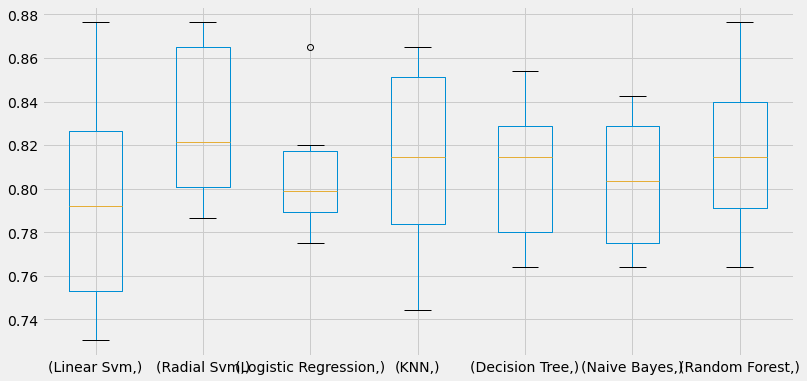

In [247]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()

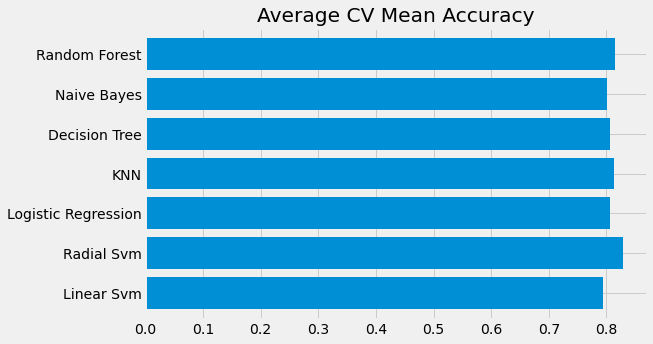

In [248]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형을 이끌 수 있습니다. 우리는 confusion matrix를 이용해서 결과를 요약할 수 있습니다. 그리고 모델이 잘못하고 있는지 예측이 잘못된지 확인할 수 있습니다.

### Confusion Matrix
분류기에 의한 결과를 정확히 보여줌

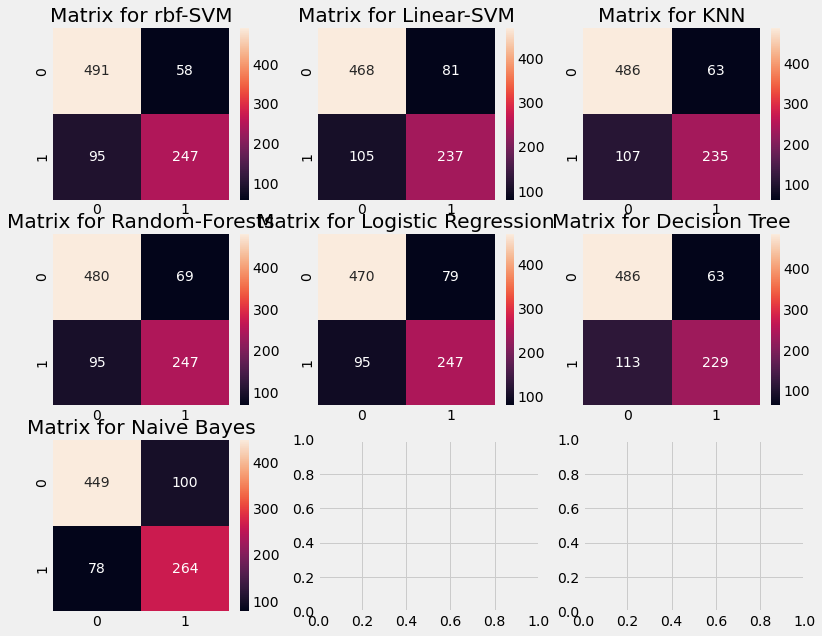

In [252]:
f, ax = plt.subplots(3,3, figsize=(12,10))

y_pred = cross_val_predict(SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0],annot=True, fmt='2.0f')
ax[0,0].set_title("Matrix for rbf-SVM")

y_pred = cross_val_predict(SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Hyperparameters Tuning
머신러닝 모델은 black box와 같다. 조정하거나 바꿀 수 있는 기본 파라메터 값이 있다. SVM의 C와 gamma와 같이 다른 분류기에는 다른 값이 있고 hyperparmeter라고 부르며 알고리즘의 학습률을 변화실 수 있어서 더 나은 모델을 얻을 수 있다.

우리는 SVM과 Random Forests를 튜닝해보겠다

### SVM

In [253]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gridSVM = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
gridSVM.fit(X,y)
print(gridSVM.best_score_)
print(gridSVM.best_estimator_)
print(gridSVM)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [261]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gridRF=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gridRF.fit(X,y)
print(gridRF.best_score_)
print(gridRF.best_estimator_)
print(gridRF)

0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)
GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': range(100, 1000, 100)}, verbose=True)


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_estimators=10)),
                                               ('RBF', SVC())])